<a href="https://colab.research.google.com/github/aryan-at-ul/pytorch_tutorials/blob/main/linear_regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np 

Text(0, 0.5, 'y')

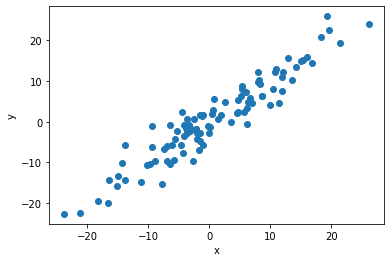

In [2]:
X = torch.randn(100,1) * 10 
y = X + 3 * torch.randn(100,1)
plt.plot(X.numpy(),y.numpy(),'o')
plt.xlabel("x")
plt.ylabel("y")

In [3]:
class LR(nn.Module):

    def __init__(self, inputsize, outputsize):
        super().__init__()
        self.linear = nn.Linear(inputsize, outputsize)

    def forward(self,x):
        pred = self.linear(x)
        return pred



In [4]:
torch.manual_seed(1)
model = LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


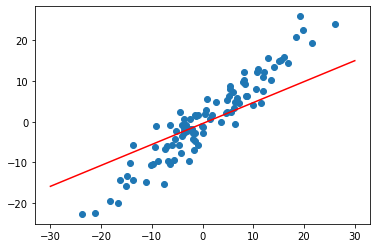

In [5]:
[w,b] = model.parameters()

def get_params():
    return (w[0][0].item(),b[0].item())


def plot_fit(title = ''):
    plt.title = title
    w,b = get_params()
    x1 = np.array([-30, 30])
    y1 = w * x1 + b
    plt.plot(x1,y1,'r')
    plt.scatter(X,y)
    plt.show()

plot_fit('initial fit')

In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

epoches = 100
losses = []
for i in range(epoches):
    y_pred = model.forward(X)
    loss = criterion(y_pred,y)
    print(f"for iteration {i} loss was {loss}")
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



for iteration 0 loss was 30.204444885253906
for iteration 1 loss was 28.786544799804688
for iteration 2 loss was 27.467796325683594
for iteration 3 loss was 26.241270065307617
for iteration 4 loss was 25.100496292114258
for iteration 5 loss was 24.03948211669922
for iteration 6 loss was 23.05266761779785
for iteration 7 loss was 22.134838104248047
for iteration 8 loss was 21.28115463256836
for iteration 9 loss was 20.487150192260742
for iteration 10 loss was 19.74863624572754
for iteration 11 loss was 19.06173324584961
for iteration 12 loss was 18.42283058166504
for iteration 13 loss was 17.828577041625977
for iteration 14 loss was 17.275840759277344
for iteration 15 loss was 16.761716842651367
for iteration 16 loss was 16.283512115478516
for iteration 17 loss was 15.838689804077148
for iteration 18 loss was 15.42495346069336
for iteration 19 loss was 15.04011344909668
for iteration 20 loss was 14.68213176727295
for iteration 21 loss was 14.34914779663086
for iteration 22 loss was 14.0

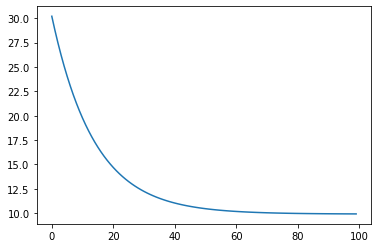

In [7]:
plt.plot(range(epoches),losses)

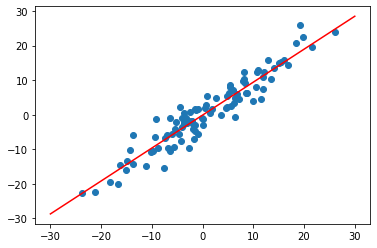

In [8]:
plot_fit("lr model")